<div class="alert alert-block alert-success">

<h1>Binary Classification - Titanic Survival</h1> 

- **Problem to solve:** On the Titanic disaster, predict who would survive based on four features: sex, age, fare, and class.
    
**Data Information:** 
   - pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
   - survived - Survival (True, False)
   - name - Name of the passenger
   - sex - Gender of the passenger
   - age - Age of the passenger
   - sibsp - Number of Siblings/Spouses Aboard
   - parch - Number of Parents/Children Aboard
   - ticket - Ticket Number
   - fare - Passenger Fare
   - cabin - Cabin
   - embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
   - boat - Lifeboat (if survived)
   - body - Body number (if did not survive and the body was recovered)


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the requierd libraries

import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
# Separate the independent and the dependent variables

columns_train = ['pclass','sex','age','fare']

columns_target = ['survived']

In [4]:
# Assign columns to our dataset

X = df[columns_train]

Y = df[columns_target]

In [5]:
# How many Null values do we have in each category?

print('Class', X['pclass'].isnull().sum(), 
      '\nSex', X['sex'].isnull().sum(),
      '\nAge', X['age'].isnull().sum(),
      '\nfare', X['fare'].isnull().sum())

Class 0 
Sex 0 
Age 263 
fare 1


In [6]:
# let's fill the empty cells with mean values (it worked better than with mode)

X['age'] = X['age'].fillna(X['age'].mean())

X['fare'] = X['fare'].fillna(X['fare'].mean())

In [7]:
# We need binary values to carry out the training,
# let's replace male and female words with 0 and 1 with the help of a dictionary

d = {'male':0, 'female':1} # Create a dictionary 

In [8]:
# Replace words with 0 or 1 as in the dictionary

X['sex'] = X['sex'].apply(lambda x:d[x])

In [9]:
# For the survived category let's use the pandas’ dummies to get the binary value

Y = pd.get_dummies(Y['survived'], drop_first=True)

In [10]:
# Let's divide the dataset into 4 different groups, training X,Y, and testing X, Y 
# Ratio of 30% for testing and 70% for training.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 17)

In [11]:
# Let's use the Support Vector Machine Algorithm, linearly divides the data into different groups

from sklearn import svm

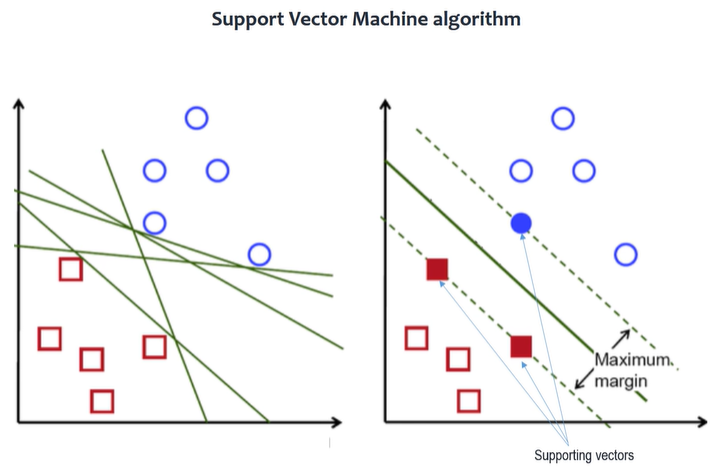

In [12]:
# let's create the model

premodel = svm.LinearSVC() 

In [13]:
# Let's train our model with our training sample

premodel.fit(X_train, Y_train)

LinearSVC()

In [14]:
# Let's make predictions on the first 10 values

premodel.predict(X_test[0:10])

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=uint8)

In [15]:
# Let's check the prediction accuracy

premodel.score(X_test, Y_test)

0.7735368956743003

<div class="alert alert-block alert-info">

**Observation:**
The prediction is relatively high, changing variables such as the sample size, and the fill NaNs with mode or mean could make an important difference.